In [1]:
# change into root directory to the project
import os
os.chdir('..')

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [3]:
from neurolib.models.aln import ALNModel

In [4]:
import pypet
import matplotlib.pyplot as plt


import numpy as np
from neurolib.models.aln import ALNModel

from neurolib.optimize.exploration import BoxSearch

import neurolib.utils.paths as paths

# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['image.cmap'] = 'plasma'

In [5]:
alnModel = ALNModel()

INFO:root:Model aln created
INFO:root:2/2 outputs added: ['rates_exc', 'rates_inh']


In [10]:
parameters = {'mue_ext_mean' : np.linspace(0, 3, 11).tolist(),
              'mui_ext_mean' : np.linspace(0, 3, 11).tolist()}
search = BoxSearch(alnModel, parameters)

MainProcess root INFO     Number of parameter configurations: 121


In [11]:
search.initializeExploration()

MainProcess root INFO     Number of processes: 8
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/exploration.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
/Users/caglar/anaconda/lib/python3.7/site-packages/pypet/parameter.py:884: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(dtype, np.str):
MainProcess root INFO     Pypet environment initialized.


In [12]:
search.run()

MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-28-19H-55M-29S-exploration`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-28-19H-55M-29S-exploration`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2020-01-28-19H-55M-29S-exploration`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-28-19H-55M-29S-exploration`.
MainProcess pypet.storageservice.HDF5StorageService INFO

In [13]:
search.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/exploration.hdf
MainProcess root INFO     Analyzing trajectory results-2020-01-28-19H-55M-29S-exploration
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/exploration.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2020-01-28-19H-55M-29S-exploration`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.
MainProcess root INFO     Creating results dictionary ...
100%|██████████| 121/121 [00:00<00:00, 197.23it/s]
MainProcess root INFO     done.


In [14]:
for i in search.dfResults.index:
    # determine maximum rate values in the last second of the simulation
    search.dfResults.loc[i, 'max_r'] = np.max(search.runResults[i]['rates_exc'][:, -int(1000/alnModel.params['dt']):])

Text(0, 0.5, 'Input to I')

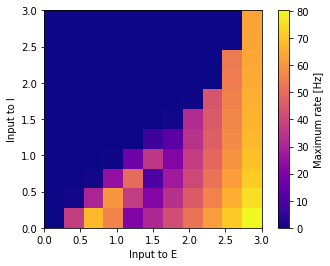

In [15]:
plt.imshow(search.dfResults.pivot_table(values='max_r', index = 'mui_ext_mean', columns='mue_ext_mean'), \
           extent = [min(search.dfResults.mue_ext_mean), max(search.dfResults.mue_ext_mean),
                     min(search.dfResults.mui_ext_mean), max(search.dfResults.mui_ext_mean)], origin='lower')
plt.colorbar(label='Maximum rate [Hz]')
plt.xlabel("Input to E")
plt.ylabel("Input to I")